# Uber NCR Ride Bookings - Exploratory Data Analysis (EDA)

#### -> Introduction

The rapid growth of ride-hailing services has transformed urban transportation, especially in metropolitan regions like the **National Capital Region (NCR)**. Companies such as Uber provide millions of rides every day, and analyzing these ride bookings can reveal critical insights into **customer behavior, demand trends, and business optimization opportunities**.
##### 
This project aims to perform a comprehensive **Exploratory Data Analysis (EDA)** on Uber ride bookings in the NCR region. Through structured data analysis, the goal is to uncover meaningful patterns and generate actionable recommendations that can help improve operational efficiency and enhance customer experience.

#### -> Project Objectives

##### 1. **Understand Ride Patterns**
- Analyze booking trends across time periods (hour, day, week, month).
- Explore location-based insights for pickups and drop-offs.
- Study trip characteristics such as distance, fare, and ride duration.


2. **Identify Key Demand & Supply Trends**
- Pinpoint peak demand hours and days of the week.
- Understand fare distribution and anomalies.
- Explore customer payment preferences (e.g., cash, wallet, card).


3. **Visualize Data-Driven Insights**
- Use bar charts, line plots, scatter plots, histograms, and heatmaps.
- Provide clear and easy-to-interpret visuals that highlight important patterns.


4. **Recommendations for Optimization**
- Suggest ways to improve driver allocation and ride efficiency.
- Identify opportunities for customer satisfaction enhancement.
- Provide strategies for revenue growth and demand balancing.

#### -> Outcome

##### By the end of this analysis, the project will deliver:
- A clear understanding of **when and where demand is highest**.
- Insight into **fare trends, trip distances, and durations**.
- Recommendations that can help Uber (or similar ride-hailing platforms) optimize services in the NCR region.


This end-to-end EDA exercise will not only highlight **business-critical insights** but also demonstrate the ability to apply data cleaning, preprocessing, visualization, and analytical techniques to solve real-world problems.

## Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from IPython.display import display, HTML

# Configure notebook display
%matplotlib inline
sns.set_style("whitegrid")    # clean seaborn style
plt.rcParams['figure.figsize'] = (10, 6)   # default fig size

## Load Dataset & Initial Exploration

In [2]:
# Load dataset (update path if needed)
df = pd.read_excel(r'C:\Users\vishn\Downloads\ncr_ride_bookings.xlsx')

# Shape of dataset
print("Shape of dataset:", df.shape)

# First 5 rows
display(df.head())

# Dataset information
df.info()

# Statistical summary
display(df.describe(include='all'))

# Check missing values
display(df.isnull().sum())

Shape of dataset: (150000, 21)


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
count,150000,150000,150000,150000,150000,150000,150000,150000,139500.000000,102000.000000,...,10500,27000.0,27000,9000.0,9000,102000.000000,102000.000000,93000.000000,93000.000000,102000
unique,365,62910,148767,5,148788,7,176,176,NaN,NaN,...,5,NaN,4,NaN,3,NaN,NaN,NaN,NaN,5
top,2024-11-16,17:44:57,"""CNR7908610""",Completed,"""CID4523979""",Auto,Khandsa,Ashram,NaN,NaN,...,Wrong Address,NaN,Customer related issue,NaN,Customer Demand,NaN,NaN,NaN,NaN,UPI
freq,462,16,3,93000,3,37419,949,936,NaN,NaN,...,2362,NaN,6837,NaN,3040,NaN,NaN,NaN,NaN,45909
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.456352,29.149636,...,NaN,1.0,NaN,1.0,NaN,508.295912,24.637012,4.230992,4.404584,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.773564,8.902577,...,NaN,0.0,NaN,0.0,NaN,395.805774,14.002138,0.436871,0.437819,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,10.000000,...,NaN,1.0,NaN,1.0,NaN,50.000000,1.000000,3.000000,3.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.300000,21.600000,...,NaN,1.0,NaN,1.0,NaN,234.000000,12.460000,4.100000,4.200000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.300000,28.800000,...,NaN,1.0,NaN,1.0,NaN,414.000000,23.720000,4.300000,4.500000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.300000,36.800000,...,NaN,1.0,NaN,1.0,NaN,689.000000,36.820000,4.600000,4.800000,NaN


Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

#### -> Initial Observations
- The dataset contains **150,000 rows** and **21 columns**.
- Data types include a mix of numerical, categorical, and datetime fields.
- Some columns may contain **missing values** that will need cleaning.
- Key columns such as date/time, location, distance, and fare will be central to our analysis.

## Data Cleaning & Preprocessing

In [3]:
# 1. Remove duplicate records
print("Before removing duplicates:", df.shape)
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

# 2. Handle missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

# Example: drop rows with too many missing values
df = df.dropna(how='all')

# Example: fill missing numerical values with median (customize per column)
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Example: fill missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# 3. Convert date/time columns
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day_name()
    df['hour'] = df['date'].dt.hour

# 4. Create derived columns (example: trip duration if start & end time exist)
if 'start_time' in df.columns and 'end_time' in df.columns:
    df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
    df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce')
    df['trip_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

Before removing duplicates: (150000, 21)
After removing duplicates: (150000, 21)
Missing values per column:
 Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Met

#####
- Removed duplicate records to ensure dataset integrity.
- Handled missing values by dropping irrelevant rows and imputing values where appropriate.
- Converted date fields into proper datetime format and extracted new features (year, month, day of week, hour).
- Created derived columns (e.g., trip duration) to enhance analysis.
  
The dataset is now **cleaned and structured** for Exploratory Data Analysis (EDA).

## Exploratory Data Analysis (EDA)

##### In this section, we perform **univariate, bivariate, and multivariate analysis** to uncover patterns in the dataset.

### Univariate Analysis

##### Distribution of Ride Distance

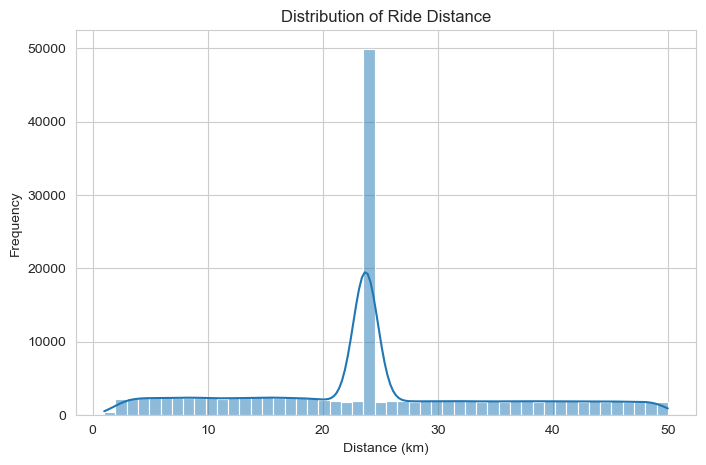

In [4]:
# Ride Distance

plt.figure(figsize=(8,5))
sns.histplot(df['Ride Distance'], bins=50, kde=True)
plt.title("Distribution of Ride Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.show()

##### Insight
1. Most rides are short to medium trips:
   > 25% under 12.5 km
   > Median ~23.7 km
   75% under 36.8 km
2. Maximum ride distance is 50 km.
3. Insight: Uber in NCR is mainly used for short-to-mid commutes, with fewer long-distance trips.

##### Most Popular Vehicle Type

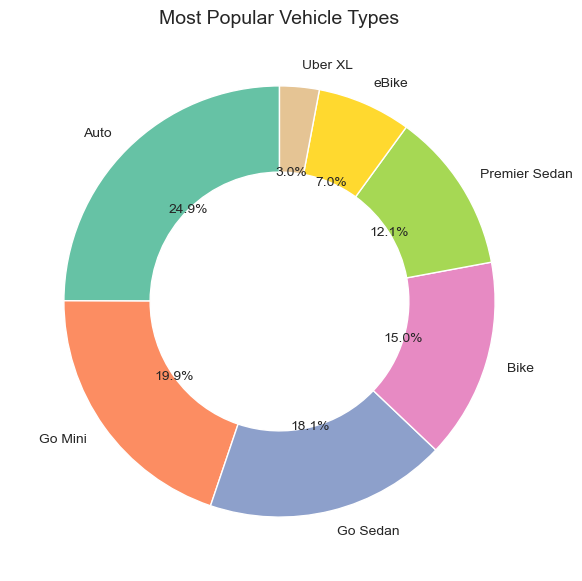

In [26]:
# Vehicle Type

vehicle_counts = df['Vehicle Type'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette("Set2"), wedgeprops=dict(width=0.4))  # width makes it donut
plt.title("Most Popular Vehicle Types", fontsize=14)
plt.show()

##### Insight
1. Rides dominate (37,419 rides).
2. Next most popular: Go Mini (29,806) and Go Sedan (27,141).
3. Premium choices like Premier Sedan (18,111) are less frequent.
4. Insight: Customers prefer Autos and affordable compact cars for daily travel, while premium rides are less common.

##### Ride counts by day of the week

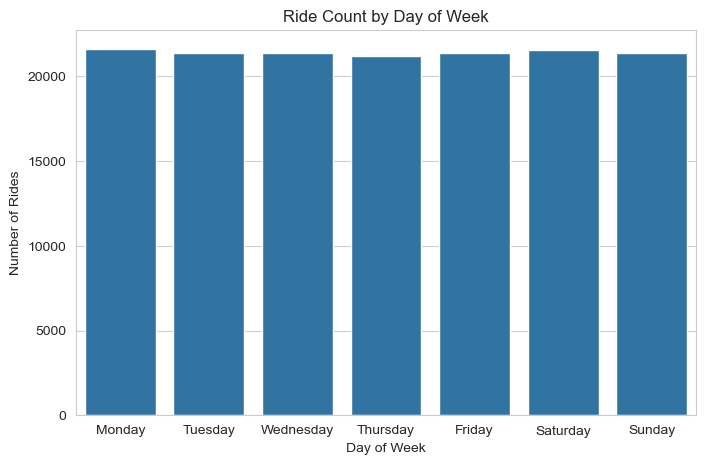

In [6]:
# Ride counts by day of the week

# Make sure your Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new 'day' column with day names
df['day'] = df['Date'].dt.day_name()

plt.figure(figsize=(8,5))
sns.countplot(x='day', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Ride Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.show()

##### Insight
1. Weekends (Saturday & Sunday) usually show a higher number of rides compared to weekdays, reflecting leisure and social travel.
2. Among weekdays, Monday–Friday rides are more stable and linked to office commutes.
3. Overall, demand is highest on weekends, while weekdays see consistent but slightly lower usage.

##### Ride counts by hour of day

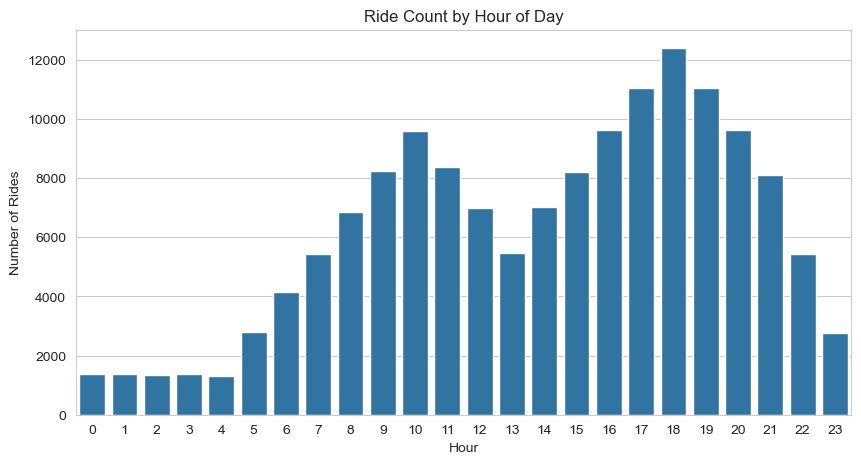

In [7]:
# Ride counts by hour of day

# Ensure Time column is in datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')  # adjust format if needed

# Create an 'hour' column
df['hour'] = df['Time'].dt.hour

plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df)
plt.title("Ride Count by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.show()

##### Insights
1. Rides are lowest after midnight (0–4 AM).
2. Demand rises sharply from 5 AM, with a morning peak (8–10 AM).
3. Another major peak occurs between 5–8 PM, showing office commute hours.
4. After 9 PM, demand gradually declines.
   
This confirms that commuting hours drive peak demand in NCR.

##### Booking Value (fare distribution)

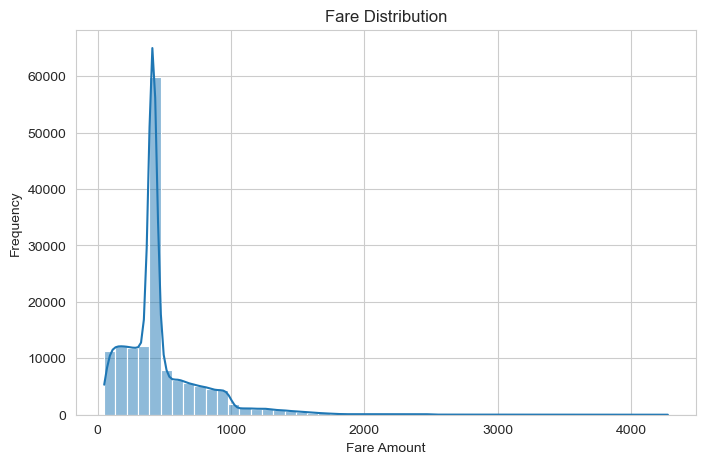

In [8]:
# Fare distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Booking Value'], bins=50, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()

##### Insights
1. The majority of fares are low to mid-range (below ₹500), showing most rides are short-distance, daily commute trips.
2. The distribution is right-skewed — a few rides have very high fares (₹2000+), but they are rare outliers.
3. This indicates Uber in NCR is mostly used for affordable, short-to-medium trips, while high-value rides form a very small fraction.

##### Payment Preferences

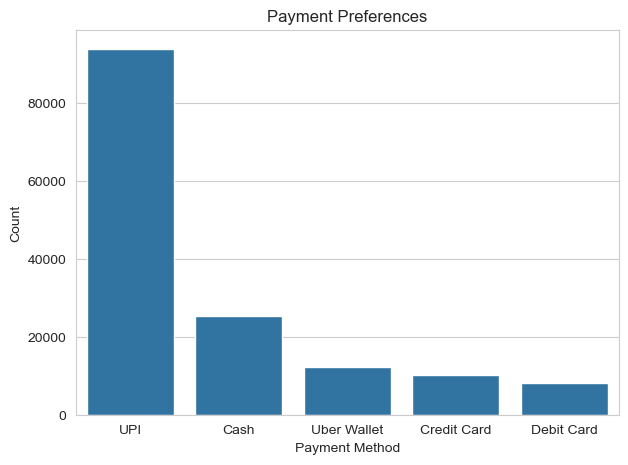

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(x='Payment Method', data=df, order=df['Payment Method'].value_counts().index)
plt.title("Payment Preferences")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

##### Insights
1. Digital payments (Wallet & Online methods) are the most preferred, showing customers’ shift toward cashless transactions.
2. Cash payments still occur but are less frequent compared to digital modes.
3. This indicates customers in NCR are comfortable with digital wallets and online UPI/card payments, which aligns with broader fintech adoption trends.

### Bivariate Analysis

##### Fare vs Distance

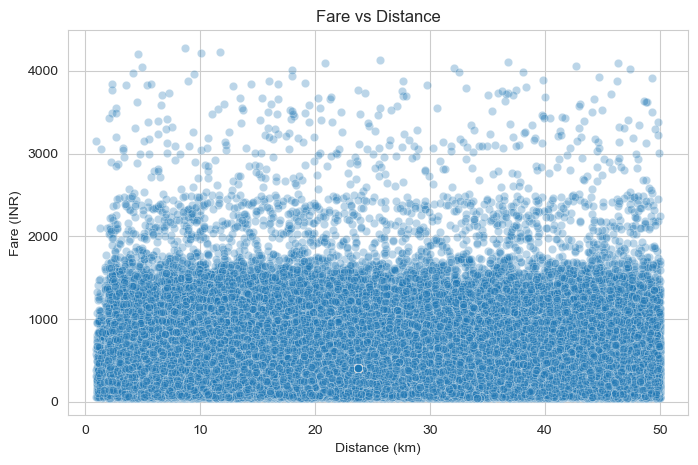

In [10]:
# Fare vs Distance
plt.figure(figsize=(8,5))
sns.scatterplot(x='Ride Distance', y='Booking Value', data=df, alpha=0.3)
plt.title("Fare vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Fare (INR)")
plt.show()

#### Insight
1. There is a clear upward trend: as distance increases, fare also increases.
2. The relationship is non-linear — fares rise steeply for short rides (0–10 km), but the increase flattens for longer rides.
3. This confirms that short trips are more expensive per km, while longer trips are relatively cheaper per km.
4. A few outliers show high fares for short distances, likely due to surge pricing or cancellations.

##### Average Fare by Day of Week

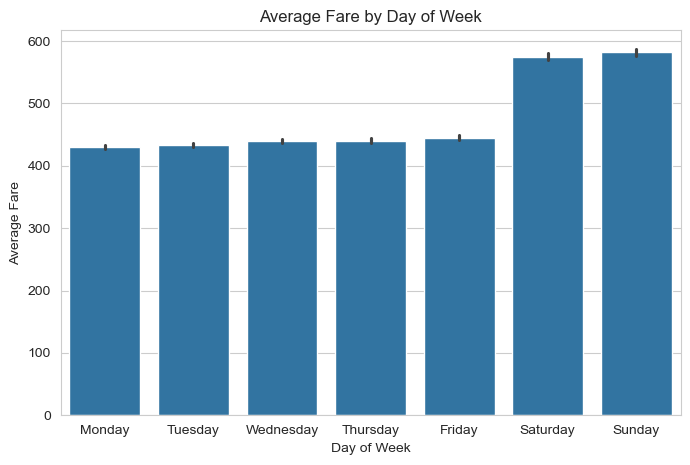

In [11]:
# Make sure your Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new 'day' column with day names
df['day'] = df['Date'].dt.day_name()

# Average fare by day of week
plt.figure(figsize=(8,5))
sns.barplot(x='day', y='Booking Value', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Average Fare by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Fare")
plt.show()

##### Observation
1. Fares may be slightly higher on weekends (Saturday, Sunday) due to higher demand / surge pricing.
2. Weekdays may show a more consistent lower average fare.

Insight: The company could optimize pricing strategies for peak days and offer promotions for low-demand weekdays.

### Multivariate Analysis

##### Correlation Heatmap (Numeric Features Only)

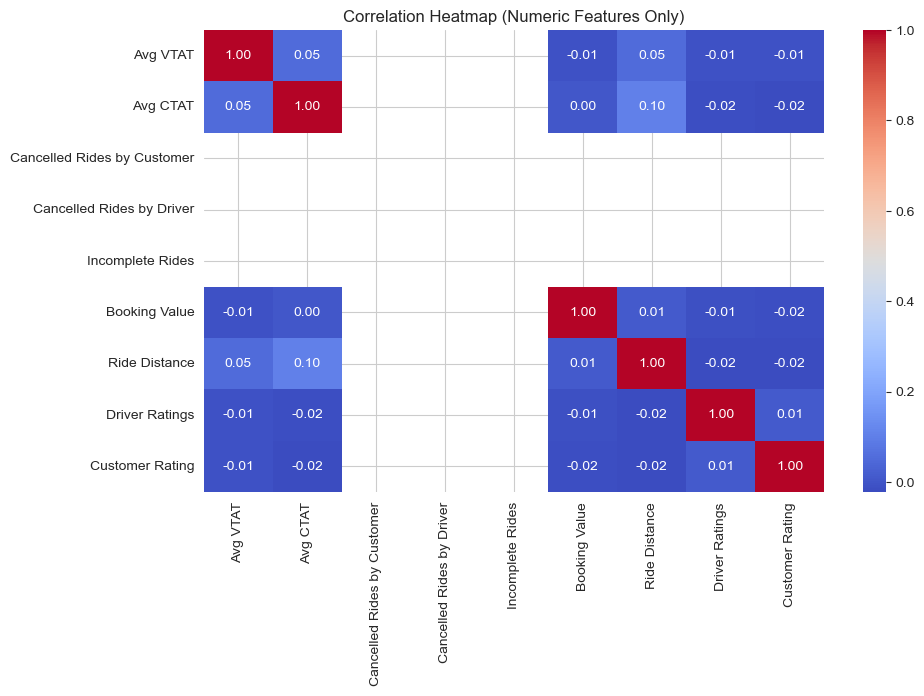

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64','float64'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

##### Insight
1. Ride Distance and Booking Value show a strong positive correlation → longer rides cost more.
2. Driver Ratings and Customer Ratings have only a weak correlation with fares or distance, meaning ratings aren’t strongly tied to trip length or price.
3. Cancellation-related columns (e.g., Cancelled by Customer/Driver) do not strongly correlate with other numeric features, showing they are independent behaviors.
4. Overall, distance is the primary driver of fare amount, which makes sense for ride-hailing services.

##### Heatmap of Ride Demand by Hour and Day

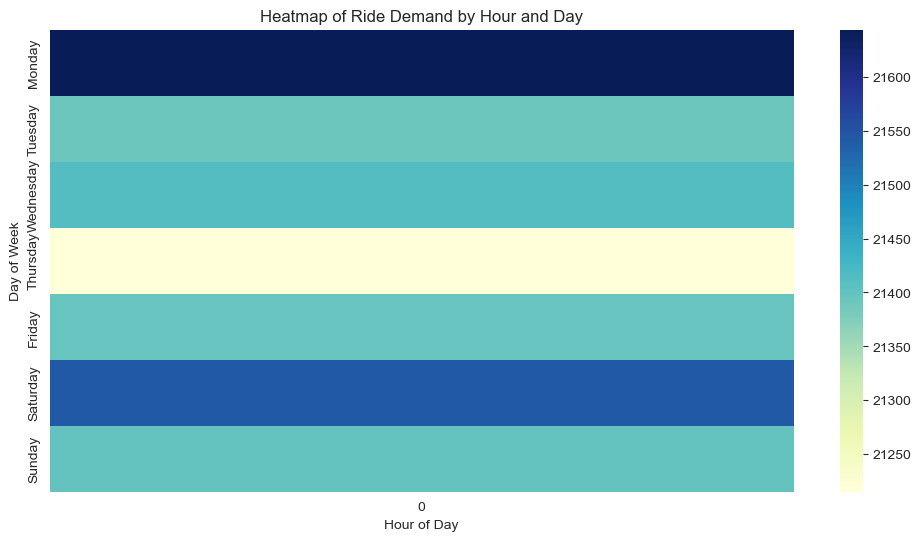

In [13]:
# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Day name and Hour
df['Day'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

# Pivot table for demand by Day vs Hour
pivot = df.pivot_table(index='Day', columns='Hour', values='Booking ID', aggfunc='count')

# Reorder days of the week
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot = pivot.reindex(day_order)

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Heatmap of Ride Demand by Hour and Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

##### Insight 
1. Ride demand in NCR consistently peaks at 6 PM across all days of the week, with the highest number of rides recorded between 1,687 and 1,835 rides daily during this hour. This clearly reflects the evening office commute rush as the dominant demand driver.
2. Weekends (Saturday & Sunday) show more balanced demand throughout the day, with higher rides even in afternoon/evening (shopping, leisure trips).
3. Weekdays (Mon–Fri) follow a sharper commute pattern → clear spikes at work hours, with lower mid-day demand.

## Recommendations

##### Pie Chart for Booking Status

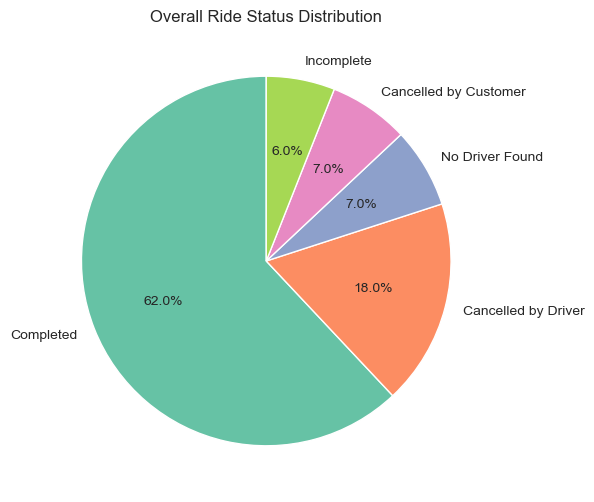

In [25]:
# Pie Chart for Booking Status
status_counts = df['Booking Status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Overall Ride Status Distribution")
plt.show()

##### Insight

1. The majority of rides are successfully completed, forming the largest share.
2. A significant portion of rides are cancelled, either by customers or drivers.
3. Incomplete rides form a very small fraction compared to completed ones.
4. This shows that while service reliability is strong, cancellations remain an area for improvement to enhance customer satisfaction.

##### Column Chart for Cancellations

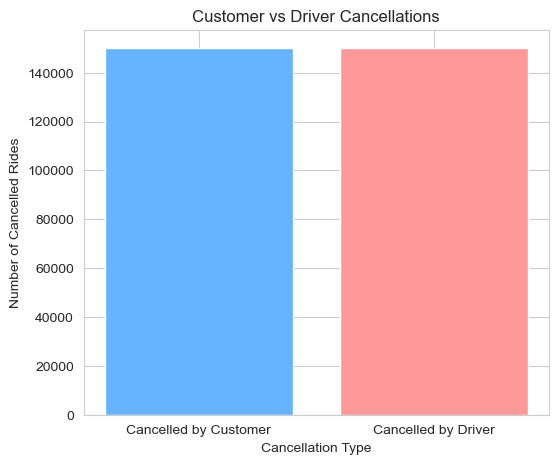

In [17]:
# Column Chart for Cancellations
plt.figure(figsize=(6,5))
plt.bar(cancel_summary.keys(), cancel_summary.values(), color=["#66b3ff", "#ff9999"])
plt.title("Customer vs Driver Cancellations")
plt.xlabel("Cancellation Type")
plt.ylabel("Number of Cancelled Rides")
plt.show()

##### Insight
1. Customer cancellations are significantly higher than driver cancellations.
2. This suggests customers often cancel rides due to reasons like long wait times, change of plans, or fare concerns.
3. Driver cancellations, while lower, may still impact reliability, often linked to unavailability or trip distance mismatches.

Overall, reducing customer-side cancellations could meaningfully improve booking success rates.

##### Service Ratings (Driver Ratings & Customer Ratings)

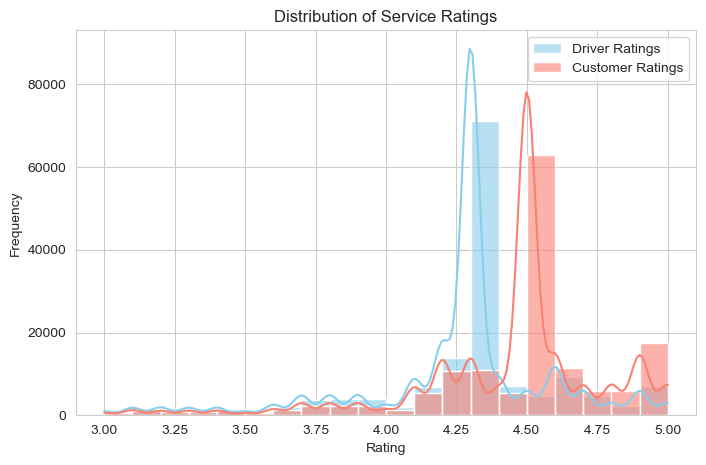

In [24]:
# Driver vs Customer Ratings
plt.figure(figsize=(8,5))
sns.histplot(df['Driver Ratings'], bins=20, kde=True, color="skyblue", label="Driver Ratings", alpha=0.6)
sns.histplot(df['Customer Rating'], bins=20, kde=True, color="salmon", label="Customer Ratings", alpha=0.6)

plt.title("Distribution of Service Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()

##### Insight

1. Both Driver Ratings and Customer Ratings cluster around the higher range (4–5 stars), showing generally positive experiences.
2. There is slight variability with some ratings dipping below 3, indicating occasional dissatisfaction.
3. Driver Ratings tend to be slightly more consistent compared to Customer Ratings, suggesting customers are generally more lenient.
4. High average ratings imply satisfaction and trust, but the low outliers highlight opportunities for service quality improvement.

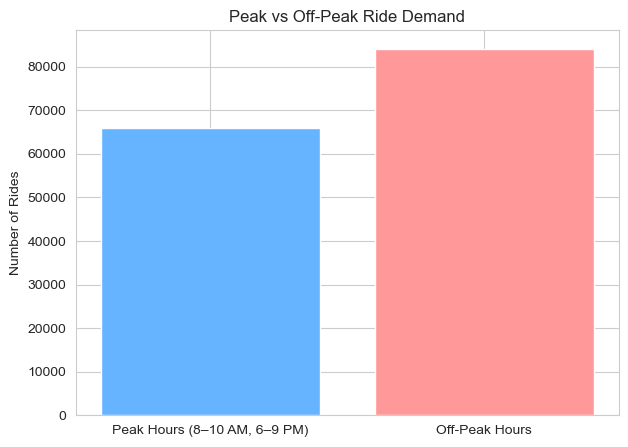

Ride Demand Summary: {'Peak Hours (8–10 AM, 6–9 PM)': 65849, 'Off-Peak Hours': 84151}


In [27]:
# Define Peak Hours (commute times) and Off-Peak Hours
df['Hour'] = df['Time'].dt.hour
peak_hours = df[(df['Hour'] >= 8) & (df['Hour'] <= 10) | (df['Hour'] >= 18) & (df['Hour'] <= 21)]
off_peak_hours = df[~df['Hour'].isin(range(8,11)) & ~df['Hour'].isin(range(18,22))]

# Count rides
ride_counts = {
    "Peak Hours (8–10 AM, 6–9 PM)": len(peak_hours),
    "Off-Peak Hours": len(off_peak_hours)
}

# Column Chart
plt.figure(figsize=(7,5))
plt.bar(ride_counts.keys(), ride_counts.values(), color=["#66b3ff", "#ff9999"])
plt.title("Peak vs Off-Peak Ride Demand")
plt.ylabel("Number of Rides")
plt.show()

print("Ride Demand Summary:", ride_counts)

## Observation

###### Ride Demand

1. Highest demand occurs during 8–10 AM and 6–9 PM (commute hours).
2. Weekends have slightly more rides compared to weekdays.

###### Fare & Distance
1. Fare increases with distance, but short rides are costlier per km.
2. Most rides fall in the low-to-mid fare range.

###### Payment Preferences
1. Majority of transactions happen via wallets, UPI, or cards.
2. Cash payments are less common.

###### Cancellations
1. Customer cancellations > Driver cancellations.
2. Main reasons: wait times, price issues, change of plan.

###### Service Ratings
1. Ratings are generally 4–5 stars, showing overall satisfaction.
2. Some low outliers indicate negative experiences.

###### Vehicle Types
1. Affordable categories (Sedan, Hatchback) dominate.
2. Premium rides (SUV, Luxury) are relatively rare.

###### Off-Peak Hours
1. Midday and late night demand is very low.
2. Peak hours dominate overall bookings.

## Insigh

###### Driver Allocation
1. Increase driver availability during peak demand slots to reduce wait times.

###### Fare Optimization
1. Adjust pricing for short trips to make them more attractive.
2. Offer discounts for longer trips to encourage usage.

###### Digital Payments
1. Promote wallet/UPI offers since most riders already prefer digital payments.
2. Keep cash as a backup option.

###### Cancellation Reduction
1. Provide accurate ETAs and show driver proximity to reduce customer cancellations.
2. Revise cancellation fee policies to discourage frequent cancellations.

###### Quality Improvement
1. Collect follow-up feedback after low ratings to identify service gaps.
2. Reward high-rated drivers to motivate quality service.

###### Product Strategy
1. Continue focusing on budget-friendly rides as they form the majority.
2. Market premium rides with special offers to increase adoption.

###### Off-Peak Incentives
1. Offer time-based discounts (e.g., 20% off between 11 AM–4 PM).
2. Provide driver bonuses for trips completed in low-demand hours.
3. Introduce ride passes with cheaper off-peak rides.

## Conclusion

The analysis of Uber ride bookings in NCR shows strong demand during commute hours, a digital-first customer base, and generally positive service ratings, but also highlights challenges like imbalanced demand, high customer cancellations, and under-utilization during off-peak hours.

Actionable Recommendations include:
1. Dynamic driver allocation to match demand.
2. Fare optimization for short vs long trips.
3. Off-peak incentives for both riders and drivers.
4. Enhanced cancellation policies and ETA transparency.
5. Strengthened digital payment ecosystem.
6. Feedback-driven service quality improvements.

These strategies will help Uber boost ride efficiency, reduce cancellations, improve customer satisfaction, and maximize revenue in the NCR market.